<a href="https://colab.research.google.com/github/jyotikashyap85399-tech/Image-classification/blob/main/NLP_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Install dependencies (if needed)
!pip install datasets transformers

from datasets import load_dataset

# Load XNLI dataset (English + another language)
dataset_en = load_dataset("xnli", "en")
dataset_fr = load_dataset("xnli", "fr")

print(dataset_en)
print(dataset_fr)


README.md: 0.00B [00:00, ?B/s]

en/train-00000-of-00001.parquet:   0%|          | 0.00/50.2M [00:00<?, ?B/s]

en/test-00000-of-00001.parquet:   0%|          | 0.00/308k [00:00<?, ?B/s]

en/validation-00000-of-00001.parquet:   0%|          | 0.00/157k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5010 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2490 [00:00<?, ? examples/s]

fr/train-00000-of-00001.parquet:   0%|          | 0.00/55.4M [00:00<?, ?B/s]

fr/test-00000-of-00001.parquet:   0%|          | 0.00/360k [00:00<?, ?B/s]

fr/validation-00000-of-00001.parquet:   0%|          | 0.00/183k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5010 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})
DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})


In [4]:
!pip install -U transformers


✅ Training samples: 4000, Test samples: 1000
{'premise': "I 'll hurry over that part .", 'hypothesis': '" I \'ll be quick with that part . "', 'label': 0}


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2645006947.py:95: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_mono = Trainer(


🚀 Training monolingual model (Tiny BERT)...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.102700,1.099282,0.339000,0.276993


model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

✅ Monolingual Model Results: {'eval_loss': 1.0992820262908936, 'eval_accuracy': 0.339, 'eval_f1': 0.2769928847692097, 'eval_runtime': 0.613, 'eval_samples_per_second': 1631.403, 'eval_steps_per_second': 203.925, 'epoch': 1.0}


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2645006947.py:114: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_multi = Trainer(


🌍 Training multilingual model (DistilBERT)...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.016200,0.947609,0.565000,0.561236


✅ Multilingual Model Results: {'eval_loss': 0.9476087689399719, 'eval_accuracy': 0.565, 'eval_f1': 0.5612355324458684, 'eval_runtime': 3.4039, 'eval_samples_per_second': 293.782, 'eval_steps_per_second': 36.723, 'epoch': 1.0}


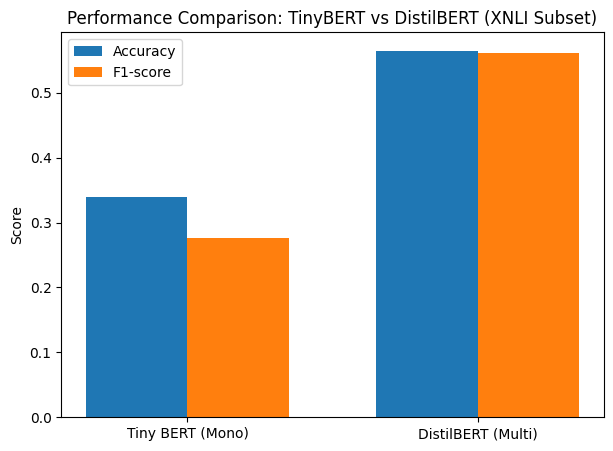

Device set to use cuda:0



📊 Final Comparison:
TinyBERT - Accuracy: 0.3390, F1: 0.2770
DistilBERT - Accuracy: 0.5650, F1: 0.5612

🌍 Multilingual DistilBERT performed better in cross-lingual generalization.
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c076c7dee1d7200919.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [6]:
# ==========================
# 📦 1. Install dependencies
# ==========================
!pip install -q datasets transformers evaluate accelerate torch matplotlib gradio

# ==========================
# 📚 2. Import libraries
# ==========================
from datasets import load_dataset, concatenate_datasets
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, pipeline
import evaluate
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

# ==========================
# 🌍 3. Load SMALL multilingual subsets (fast)
# ==========================
dataset_en = load_dataset("xnli", "en")
dataset_fr = load_dataset("xnli", "fr")

# Take small samples for quick training
train_en = dataset_en["train"].shuffle(seed=42).select(range(2000))
train_fr = dataset_fr["train"].shuffle(seed=42).select(range(2000))
test_en = dataset_en["validation"].shuffle(seed=42).select(range(500))
test_fr = dataset_fr["validation"].shuffle(seed=42).select(range(500))

train_data = concatenate_datasets([train_en, train_fr])
test_data = concatenate_datasets([test_en, test_fr])

print(f"✅ Training samples: {len(train_data)}, Test samples: {len(test_data)}")
print(train_data[0])

# ==========================
# 🧾 4. Data preprocessing
# ==========================
def preprocess_function(examples, tokenizer):
    return tokenizer(examples["premise"], examples["hypothesis"],
                     truncation=True, padding="max_length", max_length=128)

# ==========================
# 🔤 5. Define models and tokenizers (small + base)
# ==========================
mono_model_name = "prajjwal1/bert-tiny"           # Lightweight English model
multi_model_name = "distilbert-base-multilingual-cased"  # Lightweight multilingual model

mono_tokenizer = AutoTokenizer.from_pretrained(mono_model_name)
multi_tokenizer = AutoTokenizer.from_pretrained(multi_model_name)

# Tokenize datasets
tokenized_train_mono = train_data.map(lambda e: preprocess_function(e, mono_tokenizer), batched=True)
tokenized_test_mono = test_data.map(lambda e: preprocess_function(e, mono_tokenizer), batched=True)
tokenized_train_multi = train_data.map(lambda e: preprocess_function(e, multi_tokenizer), batched=True)
tokenized_test_multi = test_data.map(lambda e: preprocess_function(e, multi_tokenizer), batched=True)

# Format for PyTorch
for dset in [tokenized_train_mono, tokenized_test_mono, tokenized_train_multi, tokenized_test_multi]:
    dset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# ==========================
# 📊 6. Define metrics
# ==========================
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy.compute(predictions=preds, references=labels)["accuracy"]
    f1_score = f1.compute(predictions=preds, references=labels, average="weighted")["f1"]
    return {"accuracy": acc, "f1": f1_score}

# ==========================
# ⚙️ 7. Training arguments (FAST)
# ==========================
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",  # Corrected parameter name
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,           # only 1 epoch for speed
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    report_to="none"
)

# ==========================
# 🧩 8. Train Monolingual Model (Tiny BERT)
# ==========================
mono_model = AutoModelForSequenceClassification.from_pretrained(mono_model_name, num_labels=3)

trainer_mono = Trainer(
    model=mono_model,
    args=training_args,
    train_dataset=tokenized_train_mono,
    eval_dataset=tokenized_test_mono,
    tokenizer=mono_tokenizer,
    compute_metrics=compute_metrics,
)

print("🚀 Training monolingual model (Tiny BERT)...")
trainer_mono.train()
results_mono = trainer_mono.evaluate()
print("✅ Monolingual Model Results:", results_mono)

# ==========================
# 🌐 9. Train Multilingual Model (DistilBERT)
# ==========================
multi_model = AutoModelForSequenceClassification.from_pretrained(multi_model_name, num_labels=3)

trainer_multi = Trainer(
    model=multi_model,
    args=training_args,
    train_dataset=tokenized_train_multi,
    eval_dataset=tokenized_test_multi,
    tokenizer=multi_tokenizer,
    compute_metrics=compute_metrics,
)

print("🌍 Training multilingual model (DistilBERT)...")
trainer_multi.train()
results_multi = trainer_multi.evaluate()
print("✅ Multilingual Model Results:", results_multi)

# ==========================
# 📈 10. Visualization
# ==========================
labels = ["Tiny BERT (Mono)", "DistilBERT (Multi)"]
accuracy_scores = [results_mono["eval_accuracy"], results_multi["eval_accuracy"]]
f1_scores = [results_mono["eval_f1"], results_multi["eval_f1"]]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, accuracy_scores, width, label="Accuracy")
plt.bar(x + width/2, f1_scores, width, label="F1-score")
plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Performance Comparison: TinyBERT vs DistilBERT (XNLI Subset)")
plt.legend()
plt.show()

# ==========================
# 🧠 11. Print comparison summary
# ==========================
print("\n📊 Final Comparison:")
print(f"TinyBERT - Accuracy: {accuracy_scores[0]:.4f}, F1: {f1_scores[0]:.4f}")
print(f"DistilBERT - Accuracy: {accuracy_scores[1]:.4f}, F1: {f1_scores[1]:.4f}")

if accuracy_scores[1] > accuracy_scores[0]:
    print("\n🌍 Multilingual DistilBERT performed better in cross-lingual generalization.")
else:
    print("\n🇬🇧 TinyBERT performed better on English-only data.")

# ==========================
# 💬 12. Gradio Demo (optional)
# ==========================
pipe = pipeline("text-classification", model=multi_model, tokenizer=multi_tokenizer)

def predict_inference(premise, hypothesis):
    input_text = f"Premise: {premise}\nHypothesis: {hypothesis}"
    return pipe(input_text)[0]['label']

gr.Interface(
    fn=predict_inference,
    inputs=["text", "text"],
    outputs="text",
    title="🌐 Multilingual NLI Classifier (XNLI Tiny Demo)",
    description="Enter a premise and hypothesis to test entailment, neutrality, or contradiction."
).launch()

In [7]:
# Step 1: Redefine only the prediction function with readable labels
def predict(premise, hypothesis):
    inputs = tokenizer.encode_plus(premise, hypothesis, return_tensors='pt', truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits).item()

    # Human-readable mapping
    labels = {0: "Entailment", 1: "Neutral", 2: "Contradiction"}

    return labels.get(predicted_class, "Unknown")

# Step 2: Recreate and run the Gradio interface
import gradio as gr

iface = gr.Interface(
    fn=predict,
    inputs=["text", "text"],
    outputs="text",
    title="🌍 Multilingual NLI Classifier (Readable Output)",
    description="Enter a premise and hypothesis to test entailment, neutrality, or contradiction."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5975bedbabfc9771c2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [8]:
import torch
import gradio as gr

# Ensure model and tokenizer are accessible
try:
    model
    tokenizer
except NameError:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    model_name = "joeddav/xlm-roberta-large-xnli"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

#  Redefine prediction function with proper device handling
def predict(premise, hypothesis):
    try:
        inputs = tokenizer.encode_plus(premise, hypothesis, return_tensors='pt', truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=-1).item()

        # Human-readable mapping
        labels = {0: "Entailment", 1: "Neutral", 2: "Contradiction"}
        return labels.get(predicted_class, "Unknown")

    except Exception as e:
        return f"Error: {str(e)}"

#  Recreate Gradio Interface
iface = gr.Interface(
    fn=predict,
    inputs=["text", "text"],
    outputs="text",
    title="🌍 Multilingual NLI Classifier (Readable Output)",
    description="Enter a premise and hypothesis to test entailment, neutrality, or contradiction."
)

iface.launch(share=True)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c02b6d3226f8f004f9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
